In [1]:
import janitor
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
cancer = pd.read_csv('data.csv').clean_names()

In [14]:
cancer.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
cancer.drop('unnamed_32', axis=1, inplace=True)

In [13]:
cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
id                         569 non-null int64
diagnosis                  569 non-null uint8
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave_points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non-

In [12]:
cancer['diagnosis'] = pd.get_dummies(cancer['diagnosis'], drop_first=True)

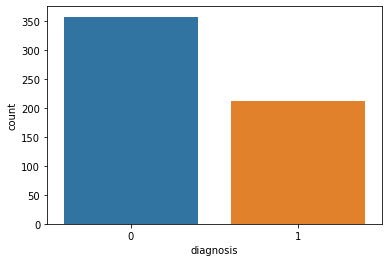

In [15]:
sns.countplot(cancer['diagnosis'])

In [16]:
cancer['diagnosis'].value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

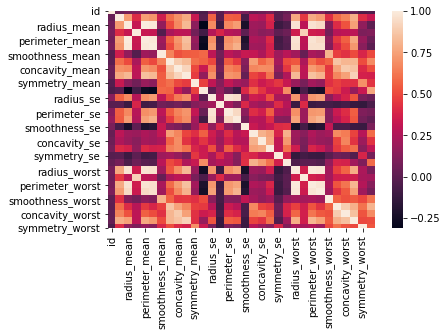

In [17]:
sns.heatmap(cancer.corr())

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(cancer.drop(['id', 'diagnosis'], axis=1), cancer['diagnosis'],
                                                   test_size=0.3, random_state=54, stratify=cancer['diagnosis'])

In [20]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((398, 30), (171, 30), (398,), (171,))

In [21]:
from sklearn.linear_model import LogisticRegression

In [22]:
logmodel = LogisticRegression()

In [23]:
logmodel.fit(X_train, y_train)

C:\Users\cyro_\Anaconda3Novo\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [25]:
logmodel.coef_, logmodel.intercept_

(array([[-1.80998894, -0.15973485, -0.07675591,  0.0142733 ,  0.11155287,
          0.30968919,  0.54007679,  0.26952806,  0.17037108,  0.00269777,
         -0.07501095, -1.37024201, -0.22094191,  0.11220272,  0.015279  ,
         -0.01723001,  0.05056177,  0.03090722,  0.00838428, -0.00720497,
         -1.36955602,  0.39073392,  0.23110219,  0.01417614,  0.22683988,
          0.79057888,  1.2887893 ,  0.52226452,  0.38879674,  0.05631063]]),
 array([-0.39102409]))

In [26]:
y_pred = logmodel.predict(X_test)

In [27]:
from sklearn.metrics import classification_report, confusion_matrix

In [28]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       107
           1       1.00      0.89      0.94        64

   micro avg       0.96      0.96      0.96       171
   macro avg       0.97      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171



In [29]:
confusion_matrix(y_test, y_pred)

array([[107,   0],
       [  7,  57]], dtype=int64)

In [37]:
teste = [cancer.drop(['id', 'diagnosis'], axis=1).iloc[46]]

In [38]:
logmodel.predict(teste)

array([0], dtype=uint8)

In [39]:
cancer.head(50)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.990,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.147100,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.71190,0.26540,0.4601,0.11890
1,842517,1,20.570,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.070170,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.24160,0.18600,0.2750,0.08902
2,84300903,1,19.690,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.127900,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.45040,0.24300,0.3613,0.08758
3,84348301,1,11.420,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.105200,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.68690,0.25750,0.6638,0.17300
4,84358402,1,20.290,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.104300,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.40000,0.16250,0.2364,0.07678
5,843786,1,12.450,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.080890,...,15.470,23.75,103.40,741.6,0.17910,0.52490,0.53550,0.17410,0.3985,0.12440
6,844359,1,18.250,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.074000,...,22.880,27.66,153.20,1606.0,0.14420,0.25760,0.37840,0.19320,0.3063,0.08368
7,84458202,1,13.710,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.059850,...,17.060,28.14,110.60,897.0,0.16540,0.36820,0.26780,0.15560,0.3196,0.11510
8,844981,1,13.000,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.093530,...,15.490,30.73,106.20,739.3,0.17030,0.54010,0.53900,0.20600,0.4378,0.10720
9,84501001,1,12.460,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.085430,...,15.090,40.68,97.65,711.4,0.18530,1.05800,1.10500,0.22100,0.4366,0.20750
